1. Data Loading and Initial Inspection



In [1]:
import pandas as pd
df = pd.read_csv(r"C:\Users\Anchita Lokhande\Downloads\student+performance\student\student-mat.csv", sep=';')
print(df.head())


  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]


In [ ]:
We use the Student Performance Dataset from the UCI Machine Learning Repository.
It includes features like gender, study time, failures, parental education, and student grades.



2. Data Summary



In [2]:

print(df.describe())
print(df.info())


              age        Medu        Fedu  traveltime   studytime    failures  \
count  395.000000  395.000000  395.000000  395.000000  395.000000  395.000000   
mean    16.696203    2.749367    2.521519    1.448101    2.035443    0.334177   
std      1.276043    1.094735    1.088201    0.697505    0.839240    0.743651   
min     15.000000    0.000000    0.000000    1.000000    1.000000    0.000000   
25%     16.000000    2.000000    2.000000    1.000000    1.000000    0.000000   
50%     17.000000    3.000000    2.000000    1.000000    2.000000    0.000000   
75%     18.000000    4.000000    3.000000    2.000000    2.000000    0.000000   
max     22.000000    4.000000    4.000000    4.000000    4.000000    3.000000   

           famrel    freetime       goout        Dalc        Walc      health  \
count  395.000000  395.000000  395.000000  395.000000  395.000000  395.000000   
mean     3.944304    3.235443    3.108861    1.481013    2.291139    3.554430   
std      0.896659    0.9988

2. Data Loading and Inspection
Load the CSV file into a Pandas DataFrame.
Use .head(), .info(), and .describe() to understand data structure and types.



3. Target Variable Analysis
Assuming we aim to predict the final grade (G3), we can analyze its distribution:


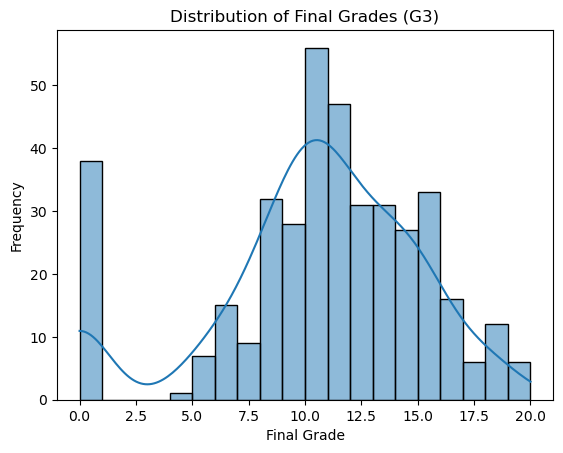

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(df['G3'], bins=20, kde=True)
plt.title('Distribution of Final Grades (G3)')
plt.xlabel('Final Grade')
plt.ylabel('Frequency')
plt.show()


3. Exploratory Data Analysis (EDA)
Understand the distribution of the target variable (G3, final grade).
Use correlation heatmaps to identify features most related to G3.
Use plots to spot outliers or skewness in numeric features.



4. Feature Correlation
Identify features that correlate with the target variable:

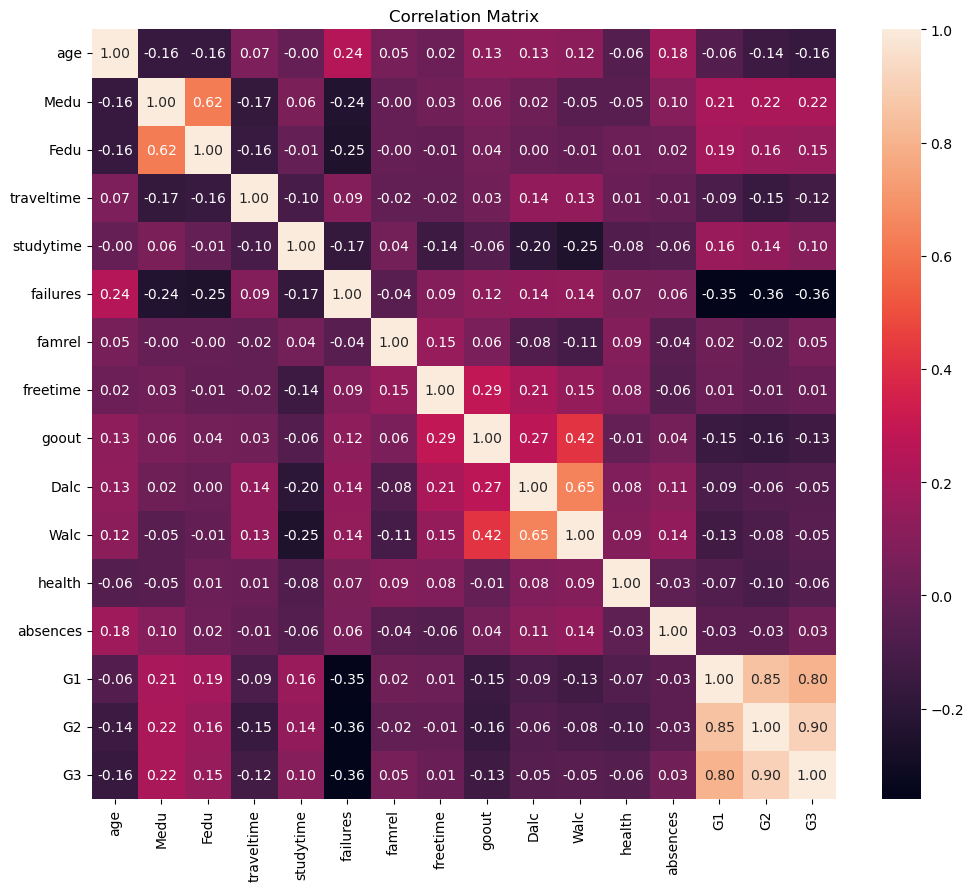

In [6]:

corr_matrix = df.select_dtypes(include=['number']).corr()

# Visualize correlations with heatmap
plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


Data Preprocessing
1. Handling Categorical Variables
Convert categorical variables into numerical format using one-hot encoding:

In [8]:
# One-hot encode categorical variables
df_encoded = pd.get_dummies(df, drop_first=True)


 Data Preprocessing
Handle categorical features using one-hot encoding.
Split the dataset into features (X) and target (y).
Divide data into training and testing sets to evaluate model performance later.



2. Feature and Target Separation
Separate features and target variable:


In [9]:
# Features and target
X = df_encoded.drop('G3', axis=1)
y = df_encoded['G3']


3. Train-Test Split
Split the dataset into training and testing sets:

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Model Building (Decision Tree)
Use DecisionTreeRegressor to create a model.
Fit the model using the training data.



 Decision Tree Model Building
Model Training
Train a Decision Tree Regressor:

In [12]:
from sklearn.tree import DecisionTreeRegressor

# Initialize and train the model
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)


DecisionTreeRegressor(random_state=42)

2. Model Evaluation
Evaluate the model's performance:


In [13]:
from sklearn.metrics import mean_squared_error, r2_score

# Predict on test set
y_pred = dt_model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")


Mean Squared Error: 4.2025316455696204
R-squared Score: 0.795048916950583


Model Evaluation
Predict results on test data.
Calculate performance metrics like:
MSE (Mean Squared Error) – measures prediction error.
R² Score – shows how well the model explains the data variability.

Feature Importance
Identify the most influential features:



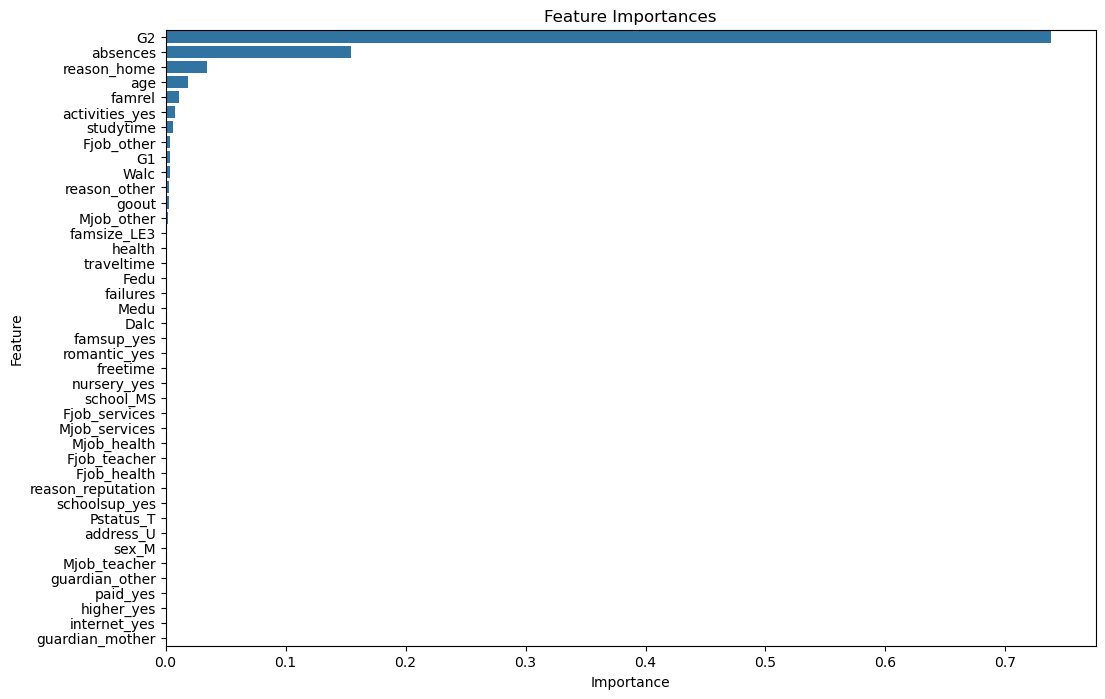

In [14]:
# Feature importance
importances = dt_model.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort and visualize
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(12,8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importances')
plt.show()


7. Feature Importance
Determine which features influence the predictions the most.
Visualize using bar plots.



Model Optimization
1. Hyperparameter Tuning
Optimize the model using Grid Search:

In [15]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize Grid Search
grid_search = GridSearchCV(DecisionTreeRegressor(random_state=42), param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)


Best Parameters: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}


Use GridSearchCV to find the best hyperparameters like:
max_depth
min_samples_split
min_samples_leaf

Retrain with Best Parameters


In [16]:
# Retrain model with best parameters
best_dt_model = grid_search.best_estimator_
best_dt_model.fit(X_train, y_train)

# Evaluate
y_pred_best = best_dt_model.predict(X_test)
mse_best = mean_squared_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)

print(f"Optimized Mean Squared Error: {mse_best}")
print(f"Optimized R-squared Score: {r2_best}")


Optimized Mean Squared Error: 6.087315149746224
Optimized R-squared Score: 0.7031308891822728


Retrain the model with the best parameters.


Model Visualization
Visualize the Decision Tree:

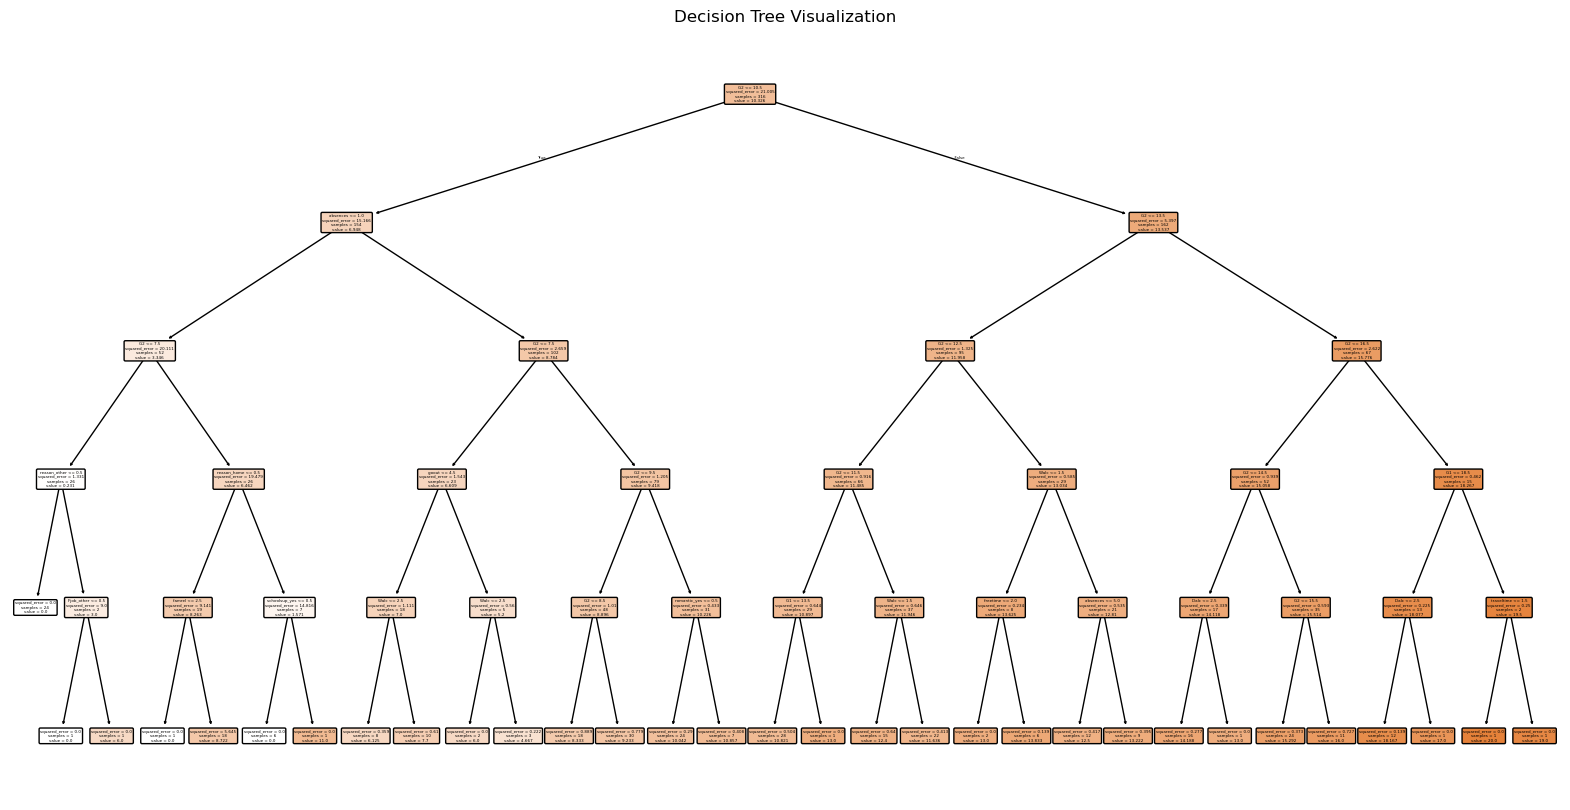

In [17]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20,10))
plot_tree(best_dt_model, feature_names=X.columns, filled=True, rounded=True)
plt.title('Decision Tree Visualization')
plt.show()


Decision Tree Visualization
Use plot_tree() to visualize how the tree splits data.
Helps in understanding decision paths and logic.



Predict a student’s final grade (G3) using various academic
and personal features through a Decision Tree model,
and understand what influences student success.

 Conclusion
The PathPredictor project demonstrates the application of a 
Decision Tree Regressor to predict student final grades based on various features.
Through comprehensive EDA, data preprocessing, model building, and optimization,
we achieve a model that can provide insights into the factors influencing student performance.

